In [2]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install scipy

# Importovanje potrebnih paketa za rad sa algoritmima nadgledanog učenja

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report,r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import iqr
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA

# Učitavanje dataset-a

In [4]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Deskriptivna analiza dataset-a
### - MEAN

In [5]:
#Mean
dataset.mean()

word_freq_make                  0.104553
word_freq_address               0.213015
word_freq_all                   0.280656
word_freq_3d                    0.065425
word_freq_our                   0.312223
word_freq_over                  0.095901
word_freq_remove                0.114208
word_freq_internet              0.105295
word_freq_order                 0.090067
word_freq_mail                  0.239413
word_freq_receive               0.059824
word_freq_will                  0.541702
word_freq_people                0.093930
word_freq_report                0.058626
word_freq_addresses             0.049205
word_freq_free                  0.248848
word_freq_business              0.142586
word_freq_email                 0.184745
word_freq_you                   1.662100
word_freq_credit                0.085577
word_freq_your                  0.809761
word_freq_font                  0.121202
word_freq_000                   0.101645
word_freq_money                 0.094269
word_freq_hp    

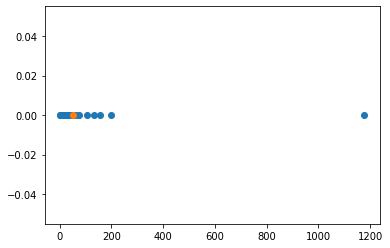

In [6]:
y = np.zeros((25))
plt.scatter(random.sample(list(dataset['capital_run_length_longest']),25), y)
plt.scatter(dataset['capital_run_length_longest'].mean(),0)

### - MEDIAN

In [7]:
# Median
dataset.median()

word_freq_make                 0.000
word_freq_address              0.000
word_freq_all                  0.000
word_freq_3d                   0.000
word_freq_our                  0.000
word_freq_over                 0.000
word_freq_remove               0.000
word_freq_internet             0.000
word_freq_order                0.000
word_freq_mail                 0.000
word_freq_receive              0.000
word_freq_will                 0.100
word_freq_people               0.000
word_freq_report               0.000
word_freq_addresses            0.000
word_freq_free                 0.000
word_freq_business             0.000
word_freq_email                0.000
word_freq_you                  1.310
word_freq_credit               0.000
word_freq_your                 0.220
word_freq_font                 0.000
word_freq_000                  0.000
word_freq_money                0.000
word_freq_hp                   0.000
word_freq_hpl                  0.000
word_freq_george               0.000
w

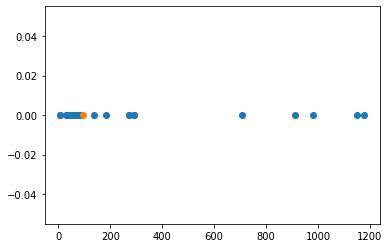

In [8]:
y = np.zeros((25))
plt.scatter(random.sample(list(dataset['capital_run_length_total']),25), y)
plt.scatter(dataset['capital_run_length_total'].median(),0)

### - MODE 

In [9]:
# Mode
dataset.mode()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,0


### - STANDARD DEVIATION 

In [10]:
#Standard deviation
dataset.std()

word_freq_make                  0.305358
word_freq_address               1.290575
word_freq_all                   0.504143
word_freq_3d                    1.395151
word_freq_our                   0.672513
word_freq_over                  0.273824
word_freq_remove                0.391441
word_freq_internet              0.401071
word_freq_order                 0.278616
word_freq_mail                  0.644755
word_freq_receive               0.201545
word_freq_will                  0.861698
word_freq_people                0.301036
word_freq_report                0.335184
word_freq_addresses             0.258843
word_freq_free                  0.825792
word_freq_business              0.444055
word_freq_email                 0.531122
word_freq_you                   1.775481
word_freq_credit                0.509767
word_freq_your                  1.200810
word_freq_font                  1.025756
word_freq_000                   0.350286
word_freq_money                 0.442636
word_freq_hp    

### - VARIANCE 

In [11]:
# Variance
dataset.var()

word_freq_make                     0.093243
word_freq_address                  1.665584
word_freq_all                      0.254160
word_freq_3d                       1.946447
word_freq_our                      0.452273
word_freq_over                     0.074980
word_freq_remove                   0.153226
word_freq_internet                 0.160858
word_freq_order                    0.077627
word_freq_mail                     0.415710
word_freq_receive                  0.040620
word_freq_will                     0.742524
word_freq_people                   0.090623
word_freq_report                   0.112348
word_freq_addresses                0.067000
word_freq_free                     0.681932
word_freq_business                 0.197185
word_freq_email                    0.282091
word_freq_you                      3.152332
word_freq_credit                   0.259862
word_freq_your                     1.441944
word_freq_font                     1.052175
word_freq_000                   

### - INTERQUARTILE RANGE

In [12]:
# Interquartile Range
for column in dataset.columns:
    print(column + ": "+ str(iqr(dataset[column])))

word_freq_make: 0.0
word_freq_address: 0.0
word_freq_all: 0.42
word_freq_3d: 0.0
word_freq_our: 0.38
word_freq_over: 0.0
word_freq_remove: 0.0
word_freq_internet: 0.0
word_freq_order: 0.0
word_freq_mail: 0.16
word_freq_receive: 0.0
word_freq_will: 0.8
word_freq_people: 0.0
word_freq_report: 0.0
word_freq_addresses: 0.0
word_freq_free: 0.1
word_freq_business: 0.0
word_freq_email: 0.0
word_freq_you: 2.64
word_freq_credit: 0.0
word_freq_your: 1.27
word_freq_font: 0.0
word_freq_000: 0.0
word_freq_money: 0.0
word_freq_hp: 0.0
word_freq_hpl: 0.0
word_freq_george: 0.0
word_freq_650: 0.0
word_freq_lab: 0.0
word_freq_labs: 0.0
word_freq_telnet: 0.0
word_freq_857: 0.0
word_freq_data: 0.0
word_freq_415: 0.0
word_freq_85: 0.0
word_freq_technology: 0.0
word_freq_1999: 0.0
word_freq_parts: 0.0
word_freq_pm: 0.0
word_freq_direct: 0.0
word_freq_cs: 0.0
word_freq_meeting: 0.0
word_freq_original: 0.0
word_freq_project: 0.0
word_freq_re: 0.11
word_freq_edu: 0.0
word_freq_table: 0.0
word_freq_conference: 

### - SKEWNESS

In [13]:
# Skewness
dataset.skew()

word_freq_make                 5.675639
word_freq_address             10.086811
word_freq_all                  3.009249
word_freq_3d                  26.227744
word_freq_our                  4.747126
word_freq_over                 5.956953
word_freq_remove               6.765580
word_freq_internet             9.724848
word_freq_order                5.226067
word_freq_mail                 8.487810
word_freq_receive              5.510250
word_freq_will                 2.867354
word_freq_people               6.955548
word_freq_report              11.754645
word_freq_addresses            6.971041
word_freq_free                10.763594
word_freq_business             5.688642
word_freq_email                5.413754
word_freq_you                  1.591674
word_freq_credit              14.602587
word_freq_your                 2.435527
word_freq_font                 9.975441
word_freq_000                  5.713775
word_freq_money               14.687028
word_freq_hp                   5.716843


### - KURTOSIS

In [14]:
# Kurtosis
dataset.kurt()

word_freq_make                  49.305064
word_freq_address              105.647472
word_freq_all                   13.308743
word_freq_3d                   726.451538
word_freq_our                   37.941169
word_freq_over                  68.445258
word_freq_remove                75.413439
word_freq_internet             169.162876
word_freq_order                 46.940256
word_freq_mail                 161.214641
word_freq_receive               39.650945
word_freq_will                  12.550747
word_freq_people                84.941822
word_freq_report               229.201271
word_freq_addresses             57.727676
word_freq_free                 196.424975
word_freq_business              45.673775
word_freq_email                 47.961674
word_freq_you                    5.257394
word_freq_credit               383.001882
word_freq_your                   9.009506
word_freq_font                 109.142325
word_freq_000                   46.807860
word_freq_money                302

# Deskriptivna analiza - pregled 

In [15]:
# Descriptive analysis
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Raspodela podataka po klasama (SPAM or NOT SPAM)

#NOT SPAM:  2788
#SPAM:  1813


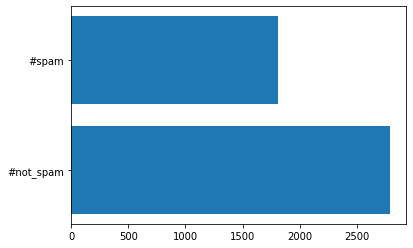

In [16]:
not_spam_count, spam_count = dataset['label_spam'].value_counts()
plt.barh(["#not_spam","#spam"], [not_spam_count, spam_count])
print("#NOT SPAM:  "+str(not_spam_count))
print("#SPAM:  "+ str(spam_count))

### Balansiranje dataseta - UNDERSAMPLING
#### Izbacivanje random uzoraka iz klase sa većim brojem instanci

#NOT SPAM:  1813
#SPAM:  1813


<BarContainer object of 2 artists>

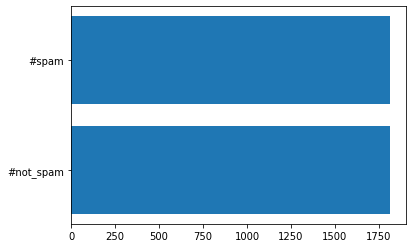

In [17]:
#Solving unbalanced dataset 
#1 undersampling

df_majority_US = dataset[dataset.label_spam == 0]
df_minority_US = dataset[dataset.label_spam == 1]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = 1813, random_state = 123)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_not_spam, undersampled_spam = df_undersampled .label_spam.value_counts()
print("#NOT SPAM:  "+str(undersampled_not_spam))
print("#SPAM:  "+ str(undersampled_spam))
plt.barh(["#not_spam","#spam"], [undersampled_not_spam, undersampled_spam])

### Balansiranje stabla - OVERSAMPLING

#### Dodavanje duplikata iz klase sa manjim brojem instanci

#NOT SPAM:  2788
#SPAM:  2788


<BarContainer object of 2 artists>

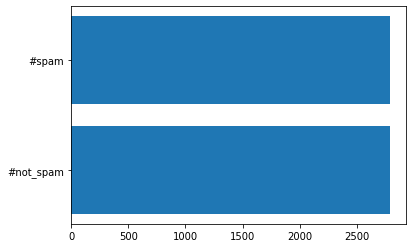

In [18]:
#2 oversampling
df_majority_OS = dataset[dataset.label_spam==0]
df_minority_OS = dataset[dataset.label_spam==1]
df_minority_upsampled = resample(df_minority_OS, 
                                 replace=True,     # sample with replacement
                                 n_samples=2788,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_not_spam, oversampled_spam = df_upsampled.label_spam.value_counts()
print("#NOT SPAM:  "+str(oversampled_not_spam))
print("#SPAM:  "+ str(oversampled_spam))
plt.barh(["#not_spam","#spam"], [oversampled_not_spam, oversampled_spam])

# Priprema dataseta za podelu na train i test

In [21]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values

X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values

In [22]:
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

# Algoritmi za predikciju
### LOGISTIC REGRESSION

In [24]:
logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)

In [25]:
logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)


#### Različite metrike za evaluaciju prediktivnog algoritma

In [30]:
conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
TP_undersampled = conf_matrix_undersampled[1,1]
TN_undersampled = conf_matrix_undersampled[0,0]
FP_undersampled = conf_matrix_undersampled[0,1]
FN_undersampled = conf_matrix_undersampled[1,0]
sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)

#### Prikaz dobijenih evaluacionih parametara

In [31]:
print("Accuracy: ", accuracy_undersampled)
print("F1 Score: ", f1_undersampled)
print("Precision: ", precision_undersampled)
print("Recall: ", recall_undersampled)
print("Specificity: ", specificity_undersampled)
print("Sensitivity: ", sensitivity_undersampled)
print("True positive: ", TP_undersampled)
print("False positive: ", FP_undersampled)
print("True negative: ", TN_undersampled)
print("False negative: ", FN_undersampled)

Accuracy:  92.01101928374655
F1 Score:  0.9171428571428571
Precision:  0.9277456647398844
Recall:  0.9067796610169492
Specificity:  0.9327956989247311
Sensitivity:  0.9067796610169492
True positive:  321
False positive:  25
True negative:  347
False negative:  33


In [32]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [33]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  92.92114695340501
F1 Score:  0.9296527159394479
Precision:  0.9222614840989399
Recall:  0.9371633752244165
Specificity:  0.9212880143112702
Sensitivity:  0.9371633752244165
True positive:  522
False positive:  44
True negative:  515
False negative:  35


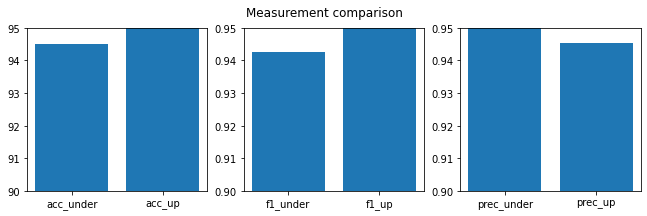

In [66]:
plt.figure(figsize=(11, 3))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_under', 'acc_up'], [accuracy_undersampled, accuracy_upsampled])
plt.subplot(132)
plt.ylim(0.9,0.95)
plt.bar(['f1_under', 'f1_up'], [f1_undersampled, f1_upsampled])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_under', 'prec_up'], [precision_undersampled, precision_upsampled])
plt.suptitle('Measurement comparison')
plt.show()


### GRADIENT BOOST with cross validation

In [44]:
#gradient boost
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled=gradient_booster.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")


Accuracy:  94.0771349862259
F1 Score:  0.9375907111756169
Precision:  0.9444444444444444
Recall:  0.930835734870317
Specificity:  0.9498680738786279
Sensitivity:  0.930835734870317
True positive:  323
False positive:  19
True negative:  360
False negative:  24
-------------
Accuracy:  93.79310344827586
F1 Score:  0.9363507779349363
Precision:  0.9403409090909091
Recall:  0.9323943661971831
Specificity:  0.9432432432432433
Sensitivity:  0.9323943661971831
True positive:  331
False positive:  21
True negative:  349
False negative:  24
-------------
Accuracy:  93.65517241379311
F1 Score:  0.9378378378378378
Precision:  0.9455040871934605
Recall:  0.9302949061662198
Specificity:  0.9431818181818182
Sensitivity:  0.9302949061662198
True positive:  347
False positive:  20
True negative:  332
False negative:  26
-------------
Accuracy:  94.62068965517241
F1 Score:  0.946938775510204
Precision:  0.9613259668508287
Recall:  0.9329758713136729
Specificity:  0.9602272727272727
Sensitivity:  0.932

In [45]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled=gradient_booster.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  96.00550964187327
F1 Score:  0.9023569023569024
Precision:  0.9305555555555556
Recall:  0.8758169934640523
Specificity:  0.9825479930191972
Sensitivity:  0.8758169934640523
True positive:  134
False positive:  10
True negative:  563
False negative:  19
-------------
Accuracy:  95.03448275862068
F1 Score:  0.8895705521472392
Precision:  0.9354838709677419
Recall:  0.847953216374269
Specificity:  0.9819494584837545
Sensitivity:  0.847953216374269
True positive:  145
False positive:  10
True negative:  544
False negative:  26
-------------
Accuracy:  95.58620689655173
F1 Score:  0.9
Precision:  0.9056603773584906
Recall:  0.8944099378881988
Specificity:  0.973404255319149
Sensitivity:  0.8944099378881988
True positive:  144
False positive:  15
True negative:  549
False negative:  17
-------------
Accuracy:  98.06896551724138
F1 Score:  0.9567901234567902
Precision:  0.9627329192546584
Recall:  0.950920245398773
Specificity:  0.9893238434163701
Sensitivity:  0.950920245398773
Tr

## Gradient boost without cross validation

In [46]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

In [48]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [49]:
gradient_booster.fit(X_train_undersampled,y_train_undersampled)
prediction_undersampled=gradient_booster.predict(X_test_undersampled)

In [50]:
conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
TP_undersampled = conf_matrix_undersampled[1,1]
TN_undersampled = conf_matrix_undersampled[0,0]
FP_undersampled = conf_matrix_undersampled[0,1]
FN_undersampled = conf_matrix_undersampled[1,0]
sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)


In [70]:
print("Accuracy: ", accuracy_undersampled)
print("F1 Score: ", f1_undersampled)
print("Precision: ", precision_undersampled)
print("Recall: ", recall_undersampled)
print("Specificity: ", specificity_undersampled)
print("Sensitivity: ", sensitivity_undersampled)
print("True positive: ", TP_undersampled)
print("False positive: ", FP_undersampled)
print("True negative: ", TN_undersampled)
print("False negative: ", FN_undersampled)

Accuracy:  94.49035812672176
F1 Score:  0.9426934097421203
Precision:  0.9563953488372093
Recall:  0.9293785310734464
Specificity:  0.9596774193548387
Sensitivity:  0.9293785310734464
True positive:  329
False positive:  15
True negative:  357
False negative:  25


In [71]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [72]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [73]:
gradient_booster.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled=gradient_booster.predict(X_test_upsampled)

In [74]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [75]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  95.43010752688173
F1 Score:  0.9546666666666667
Precision:  0.9454225352112676
Recall:  0.9640933572710951
Specificity:  0.9445438282647585
Sensitivity:  0.9640933572710951
True positive:  537
False positive:  31
True negative:  528
False negative:  20


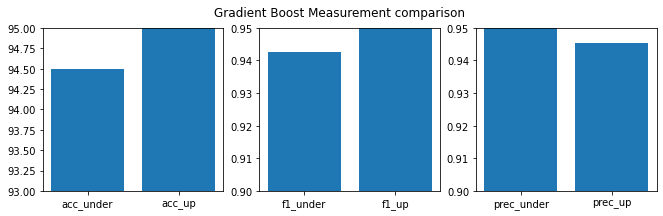

In [77]:
plt.figure(figsize=(11, 3))
plt.subplot(131)
plt.ylim(93,95)
plt.bar(['acc_under', 'acc_up'], [accuracy_undersampled, accuracy_upsampled])
plt.subplot(132)
plt.ylim(0.9,0.95)
plt.bar(['f1_under', 'f1_up'], [f1_undersampled, f1_upsampled])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_under', 'prec_up'], [precision_undersampled, precision_upsampled])
plt.suptitle('Gradient Boost Measurement comparison')
plt.show()

### NAIVE BAYES

In [127]:
#NaiveBayes
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 70)

In [128]:
model = MultinomialNB()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [129]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [130]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  79.88980716253444
F1 Score:  0.7988980716253443
Precision:  0.7795698924731183
Recall:  0.8192090395480226
Specificity:  0.7795698924731183
Sensitivity:  0.8192090395480226
True positive:  145
False positive:  41
True negative:  145
False negative:  32


### RANDOM FOREST

In [131]:
#random forest
random_forest = RandomForestClassifier(max_depth=25, random_state=0)
random_forest.fit(X_train,y_train)
prediction = random_forest.predict(X_test)

In [132]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [133]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  96.69421487603306
F1 Score:  0.9661016949152542
Precision:  0.9661016949152542
Recall:  0.9661016949152542
Specificity:  0.967741935483871
Sensitivity:  0.9661016949152542
True positive:  171
False positive:  6
True negative:  180
False negative:  6


### k - NEAREST NEIGHBORS

In [134]:
#knn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)

In [135]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [136]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  90.77134986225896
F1 Score:  0.9049645390070923
Precision:  0.8985915492957747
Recall:  0.9114285714285715
Specificity:  0.9042553191489362
Sensitivity:  0.9114285714285715
True positive:  319
False positive:  36
True negative:  340
False negative:  31


# Algoritmi za redukciju dimenzionalnosti
### RECURSIVE FEATURE ELIMINATION - RFE

In [165]:
#RFE feature reduction over logistic regression model
X = df_undersampled.drop("label_spam", axis = 1)
y = df_undersampled["label_spam"]
model = LogisticRegression(max_iter = 3000)
rfe_model = RFE(model, n_features_to_select = 5)
rfe_prediction = rfe_model.fit(X,y)
feature_list = rfe_prediction.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_undersampled.columns[feature])
    key_columns.append(df_undersampled.columns[feature])
key_columns.append("label_spam")
    

word_freq_remove
word_freq_000
word_freq_george
word_freq_cs
char_freq_$


In [166]:
columns_to_remove = []
df_rfe = df_undersampled.copy(deep=True)
for column in df_rfe.columns:
    if column not in key_columns:
        columns_to_remove.append(column)
        
rfe_removed = df_rfe.drop(columns_to_remove, axis=1)
rfe_removed.head()
        

,word_freq_remove,word_freq_000,word_freq_george,word_freq_cs,char_freq_$,label_spam
3795,0.0,0.0,0.00,0.0,0.0,0
4025,0.0,0.0,1.03,0.0,0.0,0
4329,0.0,0.0,0.00,0.0,0.0,0
3437,0.0,0.0,0.00,0.0,0.0,0
2371,0.0,0.0,0.00,0.0,0.0,0


In [167]:
X = rfe_removed.drop("label_spam",axis = 1).values
y = rfe_removed["label_spam"].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

rfe_logistic_regression_model = LogisticRegression(max_iter = 3000)
rfe_logistic_regression_model.fit(X_train,y_train)
rfe_prediction = rfe_logistic_regression_model.predict(X_test)

In [168]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=rfe_prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,rfe_prediction)*100
f1 = f1_score(y_test, rfe_prediction)
precision = precision_score(y_test, rfe_prediction)
recall = recall_score(y_test, rfe_prediction)

In [68]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  96.13793103448276
F1 Score:  0.9612188365650969
Precision:  0.9719887955182073
Recall:  0.9506849315068493
Specificity:  0.9722222222222222
Sensitivity:  0.9506849315068493
True positive:  347
False positive:  10
True negative:  350
False negative:  18


### LASSO

In [176]:
#Lasso
X = df_undersampled.drop("label_spam", axis = 1)
y = df_undersampled["label_spam"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
lasso = LassoCV(cv=3)
select_from_model = SelectFromModel(lasso,threshold = 0.01)
select_from_model.fit(X, y)
feature_list = select_from_model.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_undersampled.columns[feature])
    key_columns.append(df_undersampled.columns[feature])
    
key_columns.append("label_spam")


word_freq_free
word_freq_you
word_freq_your
word_freq_hp
word_freq_george


In [177]:
columns_to_remove = []
df_lasso = df_undersampled.copy(deep=True)
for column in df_lasso.columns:
    if column not in key_columns:
        columns_to_remove.append(column)
        
lasso_removed = df_lasso.drop(columns_to_remove, axis=1)
lasso_removed.head()

,word_freq_free,word_freq_you,word_freq_your,word_freq_hp,word_freq_george,label_spam
3795,0.0,6.00,0.00,0.00,0.00,0
4025,0.0,2.41,1.03,2.06,1.03,0
4329,0.0,2.96,0.00,0.00,0.00,0
3437,0.0,2.00,8.00,0.00,0.00,0
2371,0.0,1.72,0.00,0.00,0.00,0


In [178]:
X = lasso_removed.drop("label_spam",axis = 1).values
y = lasso_removed["label_spam"].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

lasso_logistic_regression_model = LogisticRegression(max_iter = 3000)
lasso_logistic_regression_model.fit(X_train,y_train)
lasso_prediction = lasso_logistic_regression_model.predict(X_test)

In [179]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=lasso_prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,lasso_prediction)*100
f1 = f1_score(y_test, lasso_prediction)
precision = precision_score(y_test, lasso_prediction)
recall = recall_score(y_test, lasso_prediction)

In [180]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  83.7465564738292
F1 Score:  0.8289855072463769
Precision:  0.8511904761904762
Recall:  0.807909604519774
Specificity:  0.8655913978494624
Sensitivity:  0.807909604519774
True positive:  286
False positive:  50
True negative:  322
False negative:  68


### EXTRA TREE

In [147]:
et_classifier = ExtraTreesClassifier()
et_classifier.fit(X,y)
select_from_model = SelectFromModel(et_classifier, threshold = 0.05)
select_from_model.fit(X,y)
feature_list = select_from_model.get_support(indices=True)
for feature in feature_list:
    print(df_undersampled.columns[feature])


word_freq_remove
word_freq_your
char_freq_!


### PRINCIPAL COMPONENT ANALYSIS - PCA

In [148]:
#PCA feature variances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
feature_variances = pca.explained_variance_ratio_
feature_variances

array([9.14954114e-01, 8.36999912e-02, 1.26901179e-03, 2.37364760e-05,
       9.04293641e-06, 6.82779117e-06, 5.65989198e-06, 3.32969194e-06,
       2.99708041e-06, 2.42630358e-06, 1.97046657e-06, 1.75885669e-06,
       1.62536840e-06, 1.61359420e-06, 1.44465583e-06, 1.29936844e-06,
       1.12803974e-06, 1.00851307e-06, 9.38706265e-07, 9.08931281e-07,
       8.14458684e-07, 7.40298446e-07, 6.53992390e-07, 5.38753552e-07,
       4.90751536e-07, 4.55927580e-07, 4.28663328e-07, 4.18855953e-07,
       4.03808531e-07, 3.90915793e-07, 3.63013745e-07, 3.35682949e-07,
       2.67409826e-07, 2.60262764e-07, 2.35925521e-07, 2.22050320e-07,
       2.18724063e-07, 1.85852875e-07, 1.72478465e-07, 1.60950875e-07,
       1.55262395e-07, 1.47500699e-07, 1.38138663e-07, 1.24208357e-07,
       1.20615616e-07, 1.10468893e-07, 1.06346008e-07, 8.64835979e-08,
       8.48810352e-08, 7.36925573e-08, 6.98280544e-08, 6.60675985e-08,
       5.99292269e-08, 3.42959517e-08, 1.55312477e-08, 1.36437137e-08,
      

# Kombinacija logističke regresije sa PCA algoritmom

In [149]:
#PCA decomposition over LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
logmodel=LogisticRegression(max_iter = 3000)
logmodel.fit(X_train, y_train)
prediction = logmodel.predict(X_test)

In [150]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [151]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  90.08264462809917
F1 Score:  0.9019073569482289
Precision:  0.8826666666666667
Recall:  0.9220055710306406
Specificity:  0.8801089918256131
Sensitivity:  0.9220055710306406
True positive:  331
False positive:  44
True negative:  323
False negative:  28


### RIDGE REGRESSION

In [152]:
#Ridge
#error over train set 
model = Ridge(alpha = 0.04, normalize = True)
model_fit = model.fit(X_train, y_train)
prediction_train = model_fit.predict(X_train)
print("Train set errors:")
print(np.sqrt(mean_squared_error(y_train,prediction_train)))
print(r2_score(y_train, prediction_train))

#error over test set
prediction_test = model_fit.predict(X_test)
print("Test set errors:")
print(np.sqrt(mean_squared_error(y_test,prediction_test)))
print(r2_score(y_test, prediction_test))

Train set errors:
0.362998440829778
0.47292451678244085
Test set errors:
0.3493071882994953
0.5118786828665456
